In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [14]:
def two_labels_behaviours(df):
    
    snout1 = df.iloc[3:,[1,2]]
    rightear1 = df.iloc[3:,[4,5]]
    leftear1 = df.iloc[3:,[7,8]]
    dorsal1 = df.iloc[3:,[10,11]]
    thoracic1 = df.iloc[3:,[13,14]]
    lumbar1 = df.iloc[3:,[16,17]]
    tail1 = df.iloc[3:,[19,20]]
    snout2 = df.iloc[3:,[22,23]]
    rightear2 = df.iloc[3:,[25,26]]
    leftear2 = df.iloc[3:,[28,29]]
    dorsal2 = df.iloc[3:,[31,32]]
    thoracic2 = df.iloc[3:,[34,35]]
    lumbar2 = df.iloc[3:,[37,38]]
    tail2 = df.iloc[3:,[40,41]]
    
    #all combinations of behaviours of interest
    two_labels = [[snout1, snout2], [snout1, rightear2], [snout1, leftear2], [snout1,dorsal2], [snout1,thoracic2], [snout1, lumbar2], [snout1, tail2] ,[rightear1, snout2], [leftear1, snout2], [dorsal1, snout2],  [thoracic1, snout2], [lumbar2, snout2], [tail1, snout2]] 
    plot_titles = ["snout1, snout2", "snout1, rightear2", "snout1, leftear2", "snout1,dorsal2", "snout1,thoracic2", "snout1, lumbar2", "snout1, tail2" ,"rightear1, snout2", "leftear1, snout2", "dorsal1, snout2",  "thoracic1, snout2", "lumbar2, snout2", "tail1, snout2"] 
    
    return two_labels, plot_titles

In [59]:
csv_files = []
dirname = r"C:\Users\Hansine\NewProjectExtraLabel-Hansine-2022-03-09\videos"
ext = '.csv'

one_pixel = 0.102 #cm
threshold = 2 #cm

for csv_file in (os.scandir(dirname)):
    if csv_file.path.endswith(ext):
        csv_files.append(csv_file)

In [70]:
all_csv_dfs = []

for csv_file in csv_files:
    results = []
    df = pd.read_csv(csv_file)
    dfs_tuples_from_two_labels_combinations, plot_titles = two_labels_behaviours(df)
    all_csv_dfs.append(dfs_tuples_from_two_labels_combinations)
    #for combinations in a:
     #   distances = pd.concat([combinations[0], combinations[1]], axis=1) #create dataframe
      #  distances['dist_pixels']=np.linalg.norm(combinations[0].values.astype(float) - combinations[1].values.astype(float), axis=1) #distance between body parts of interest
       # distances['dist_cm'] = distances['dist_pixels']*one_pixel #convert to cm
        #distances['interaction'] = distances['dist_cm']<threshold #apply threshold
        #interactions_true_table = distances.loc[distances["interaction"]== True] #locate points below threshold
        #results.append(interactions_true_table)
    #files_results.append(results)

In [86]:
all_files_results = []
# looping over all the csv files dataframes
for csv_file_combinations in all_csv_dfs:
    file_results =[]
    # for each csv file dataframe, calculates threshold distances to extract poses
    for labels_tuple in csv_file_combinations:
        distances = pd.concat([labels_tuple[0], labels_tuple[1]], axis=1) #create dataframe
        distances['dist_pixels']=np.linalg.norm(labels_tuple[0].values.astype(float) - labels_tuple[1].values.astype(float), axis=1) #distance between body parts of interest
        distances['dist_cm'] = distances['dist_pixels']*one_pixel #convert to cm
        distances['interaction'] = distances['dist_cm']<threshold #apply threshold
        interactions_true_table = distances.loc[distances["interaction"]== True] #locate points below threshold
        file_results.append(interactions_true_table)
        
    all_files_results.append(file_results)

C:\Users\Hansine\AppData\Local\Temp\ipykernel_16268\2979180391.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


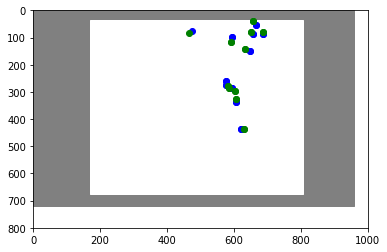

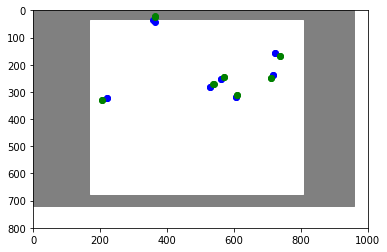

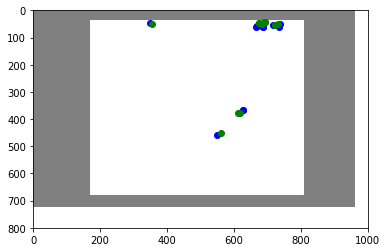

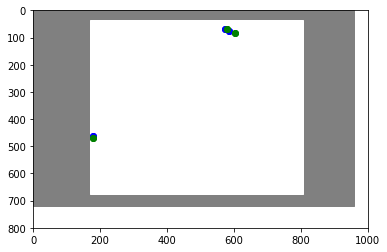

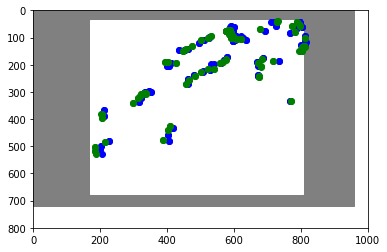

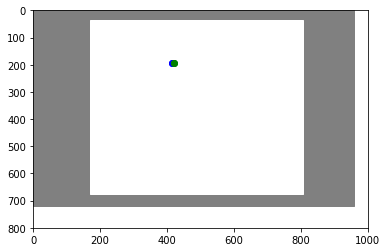

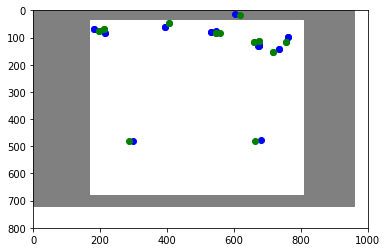

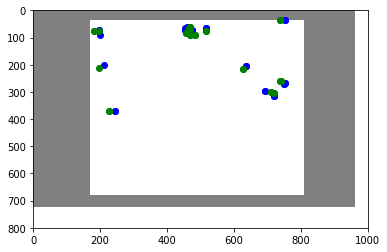

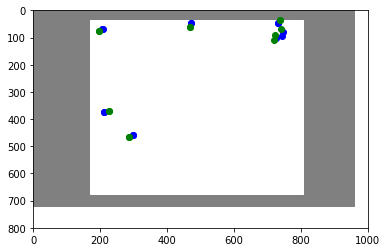

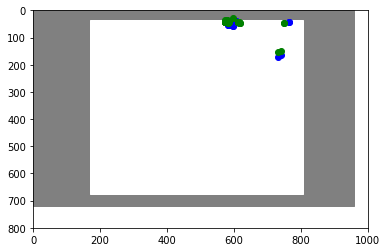

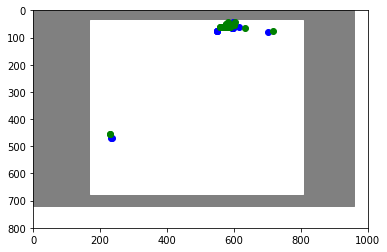

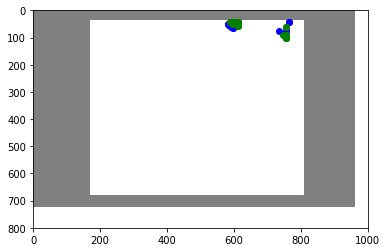

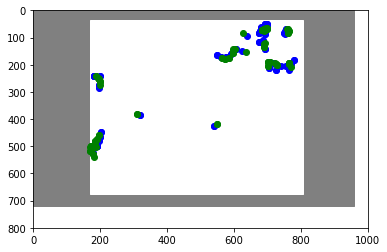

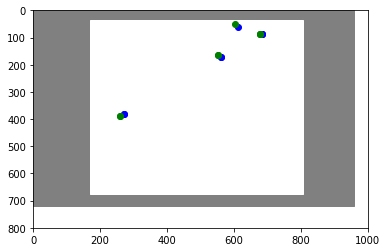

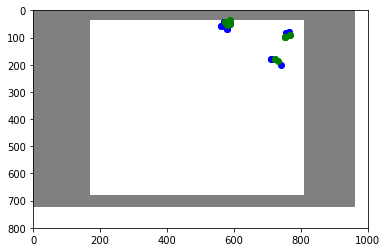

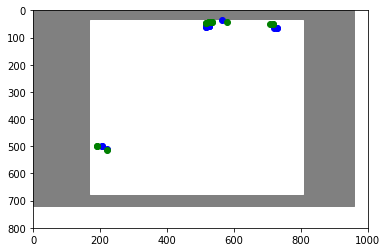

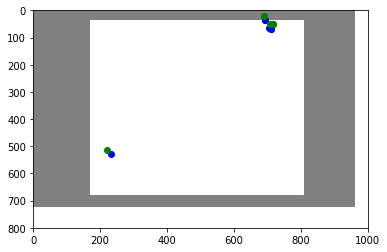

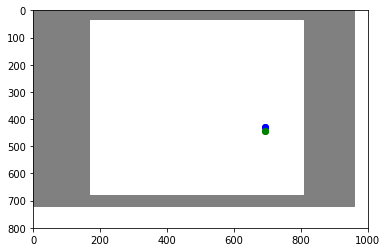

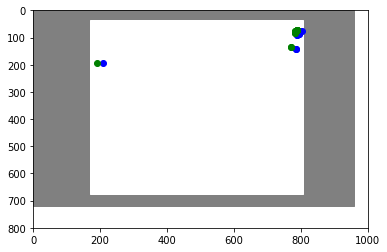

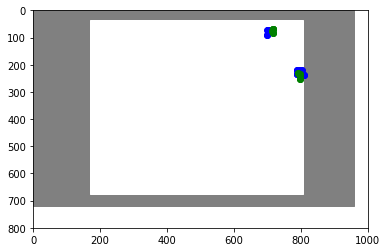

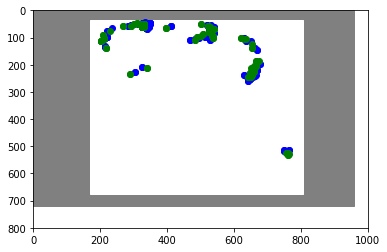

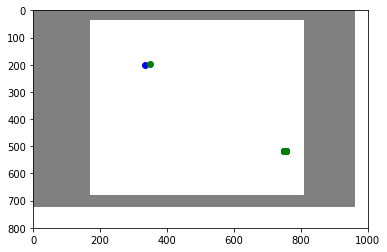

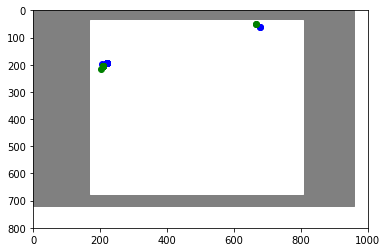

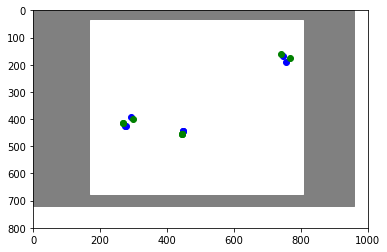

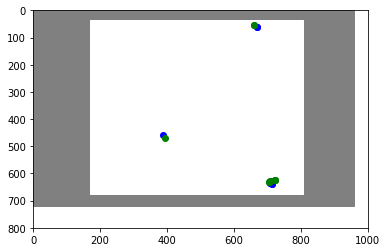

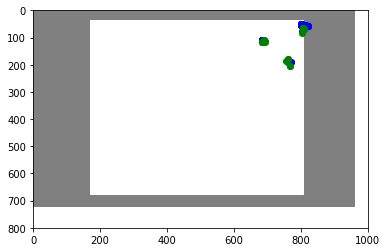

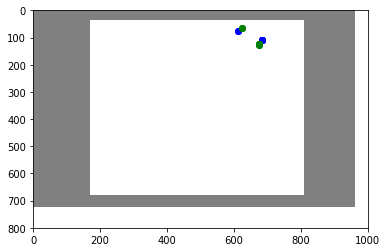

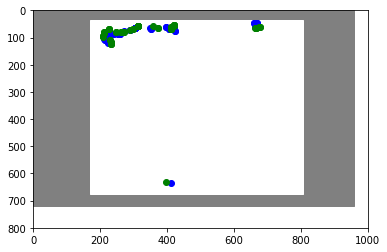

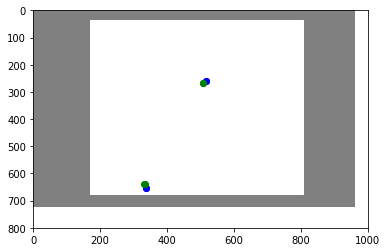

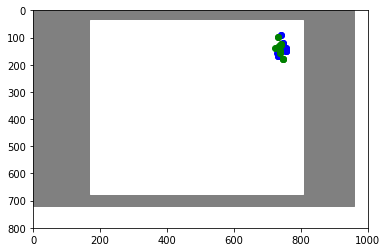

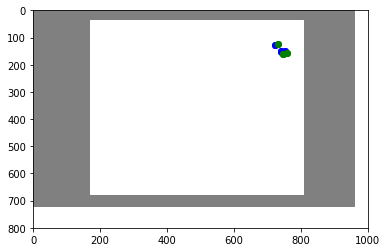

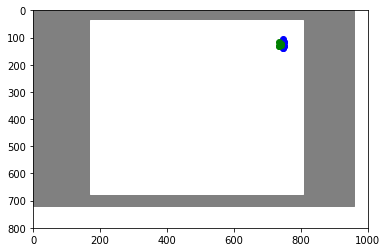

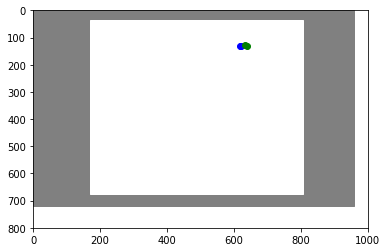

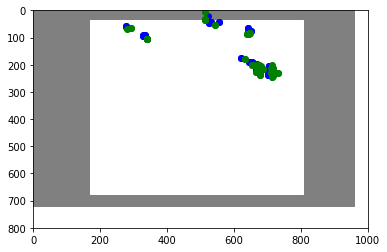

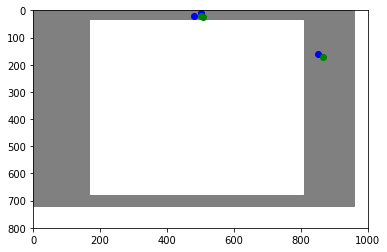

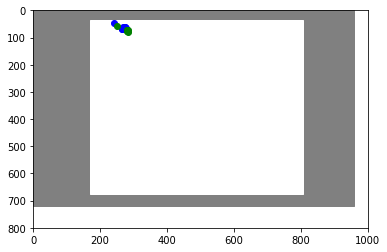

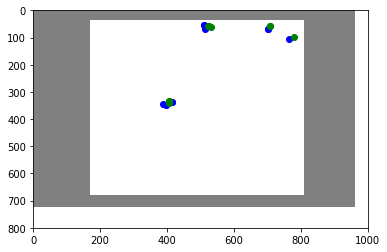

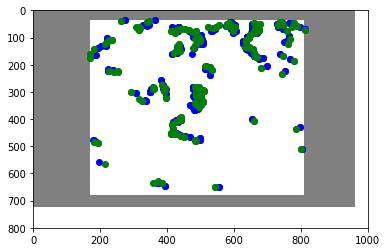

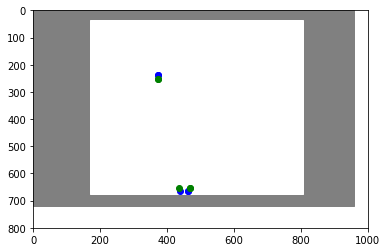

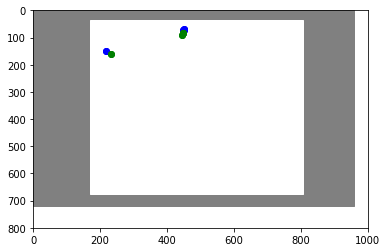

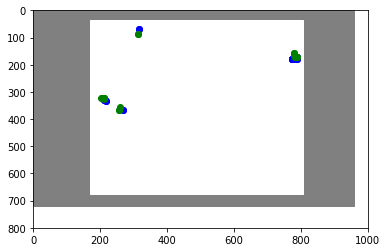

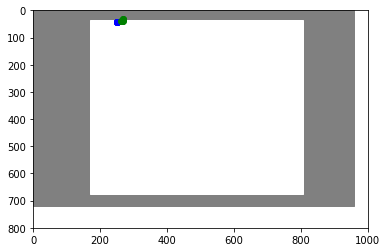

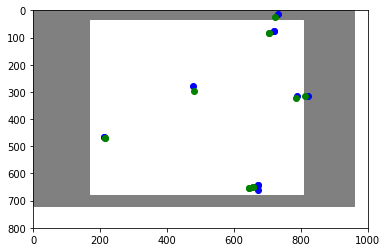

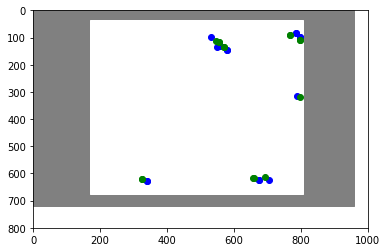

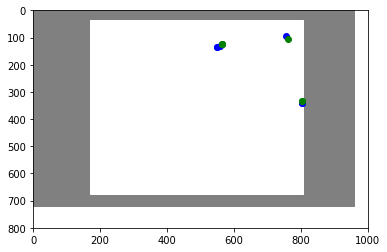

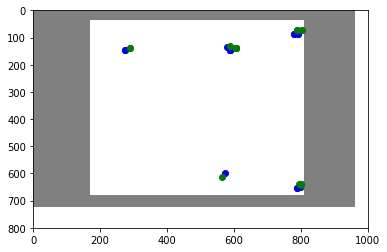

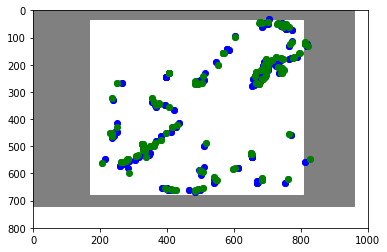

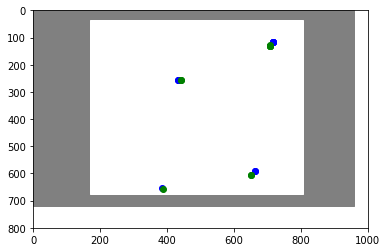

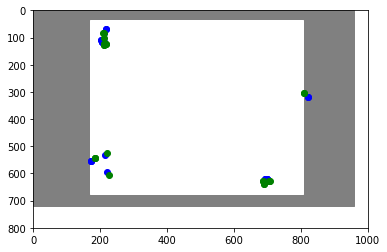

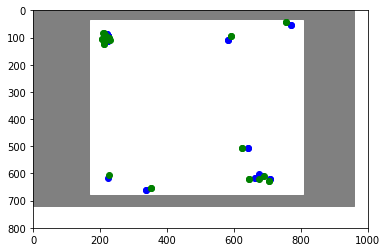

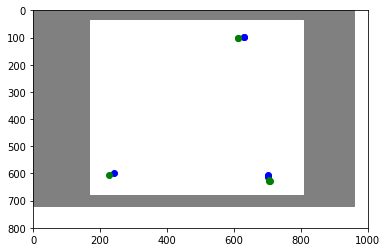

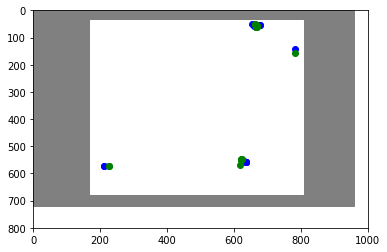

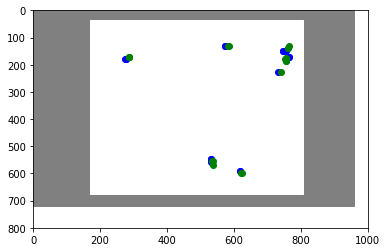

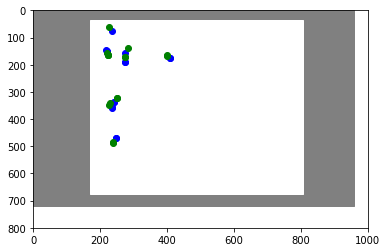

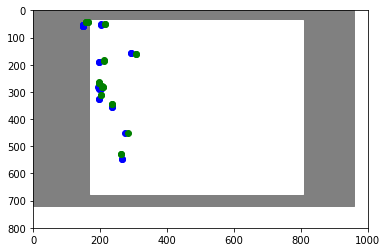

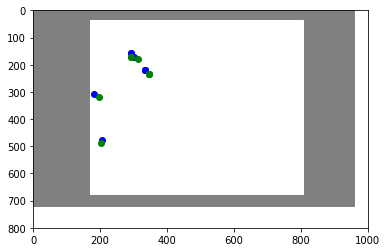

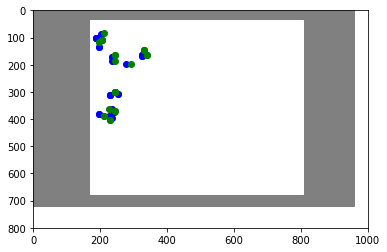

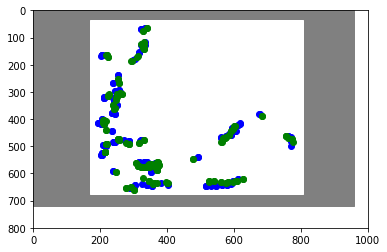

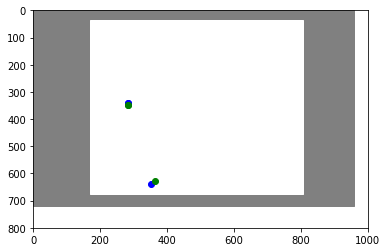

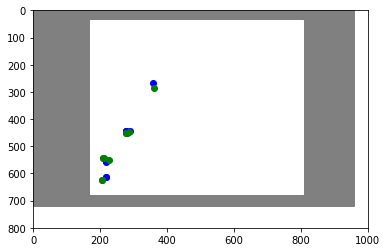

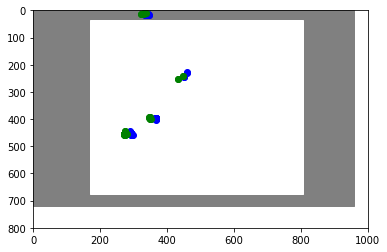

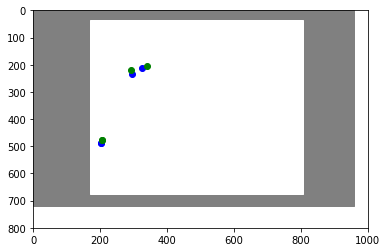

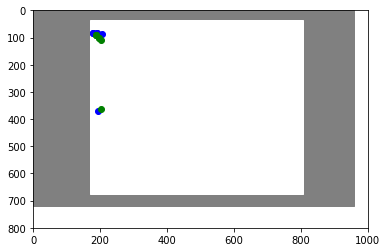

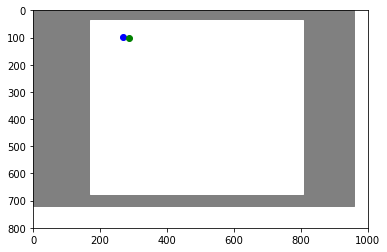

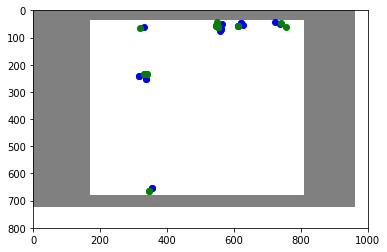

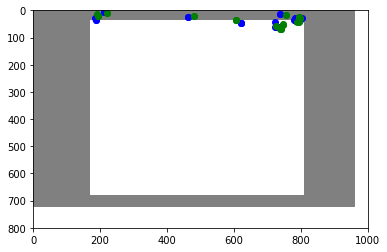

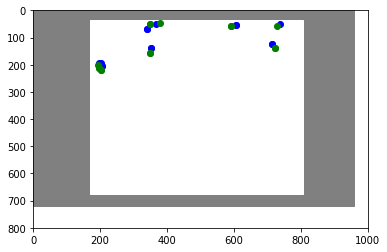

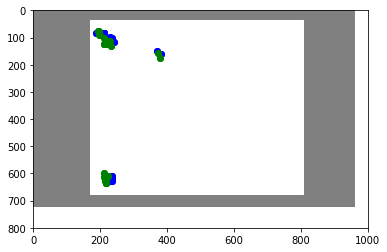

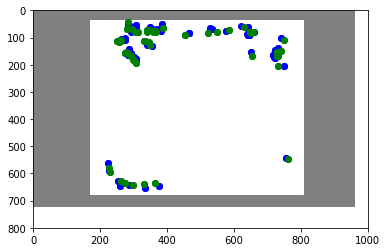

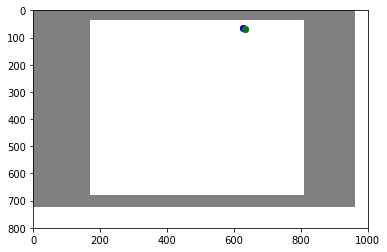

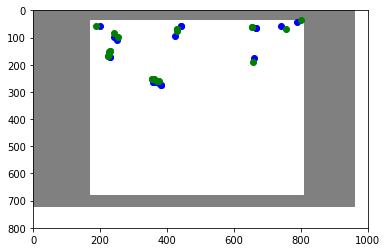

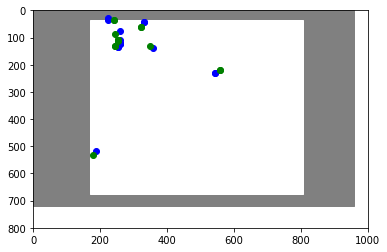

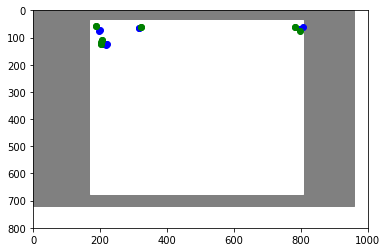

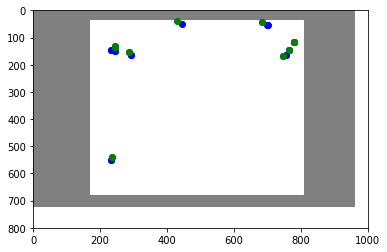

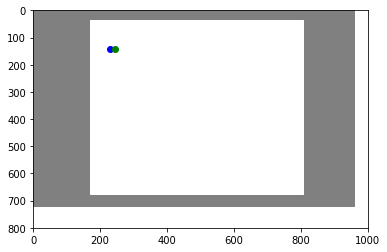

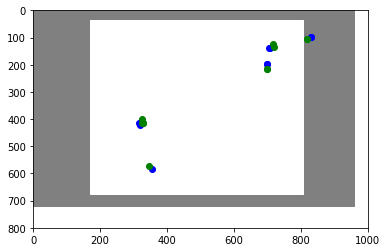

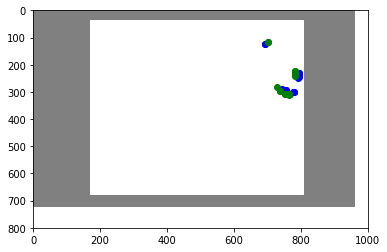

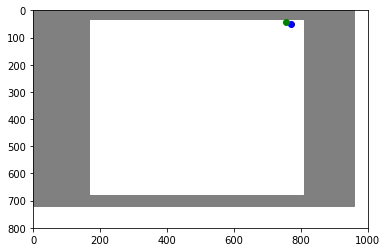

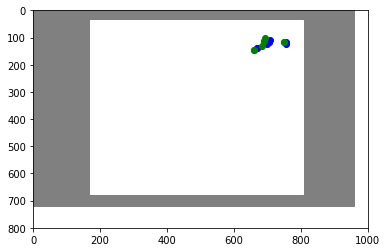

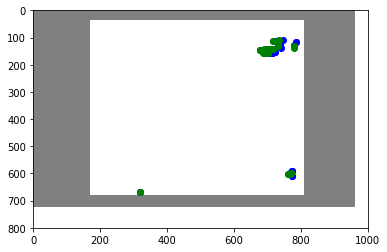

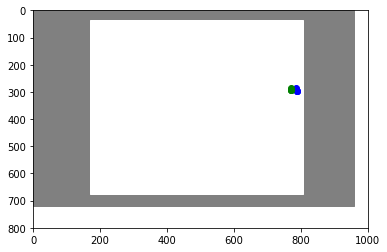

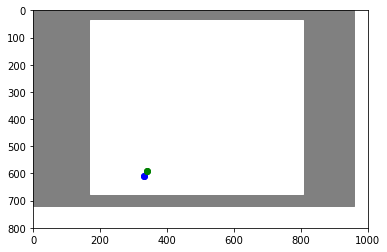

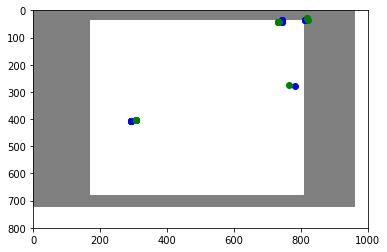

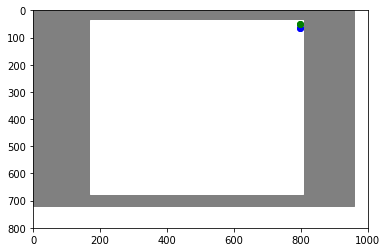

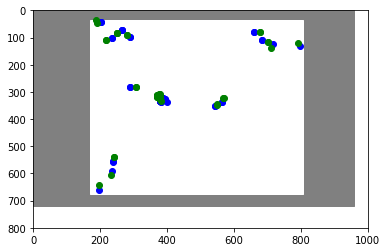

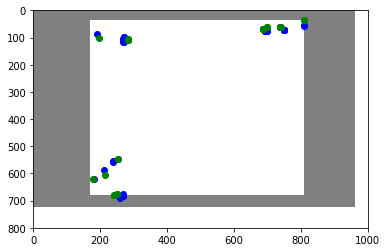

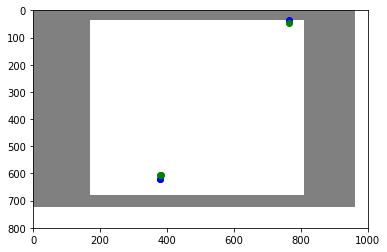

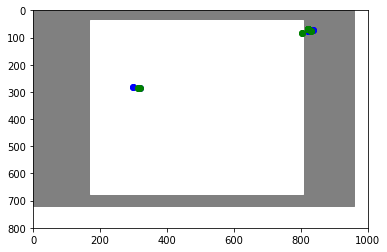

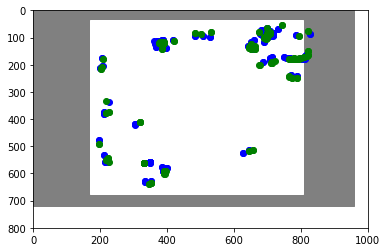

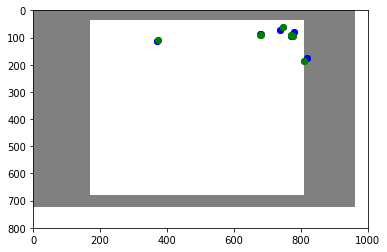

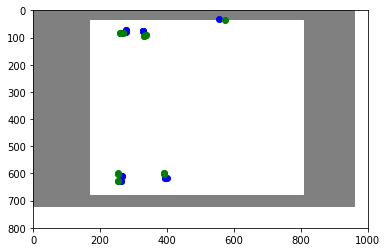

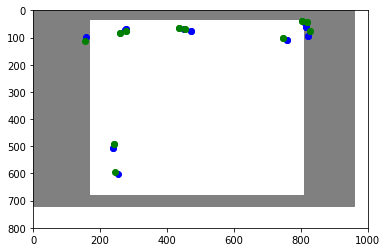

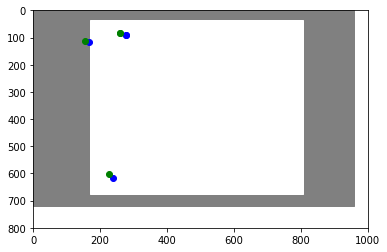

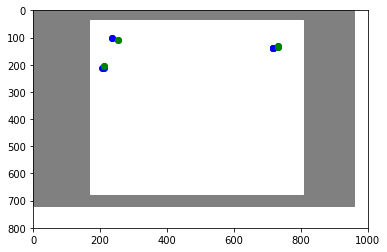

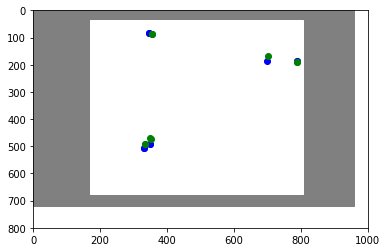

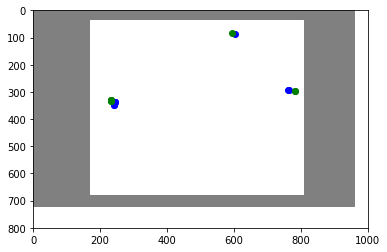

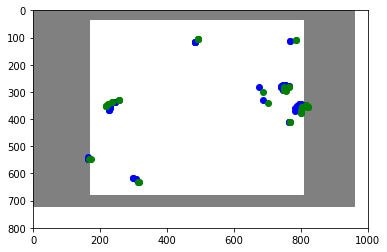

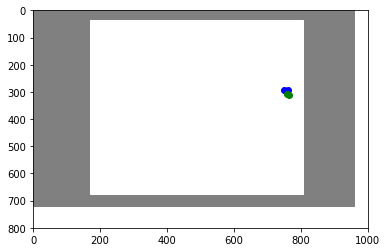

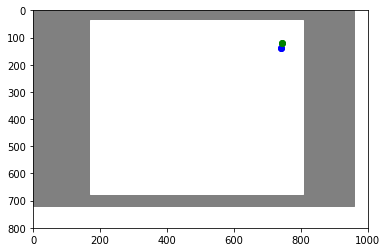

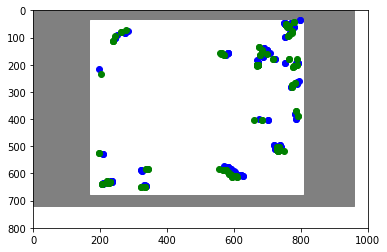

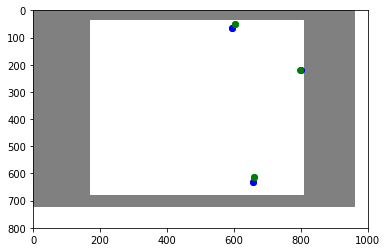

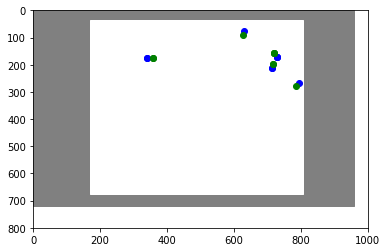

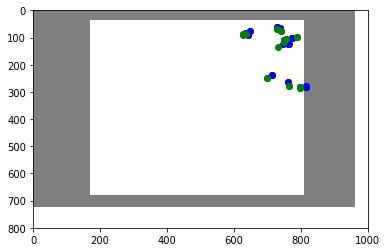

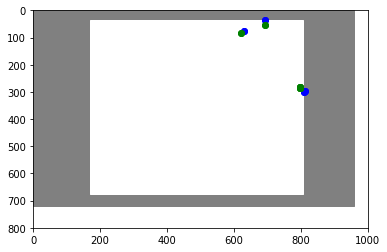

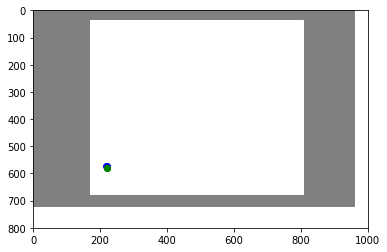

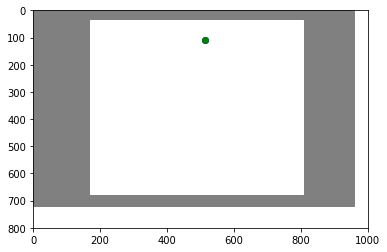

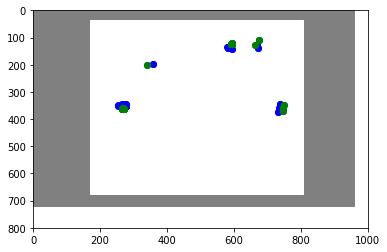

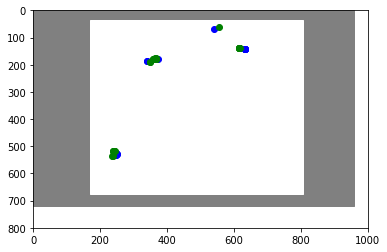

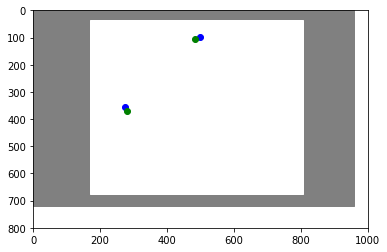

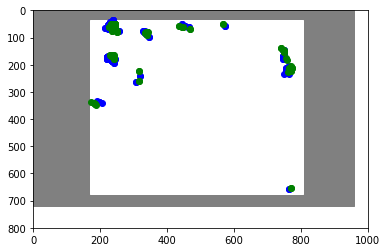

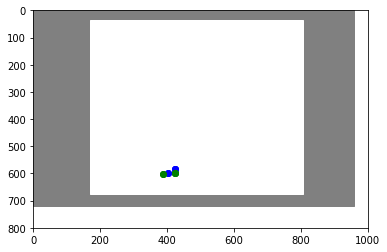

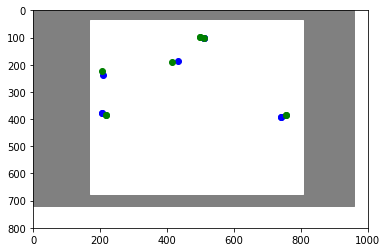

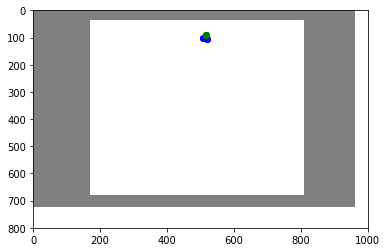

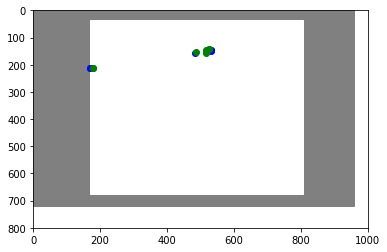

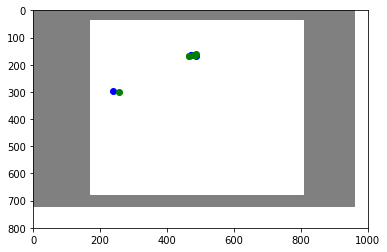

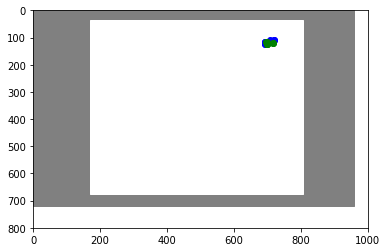

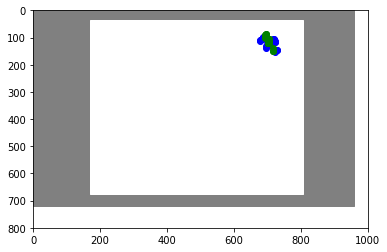

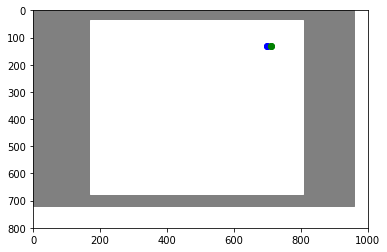

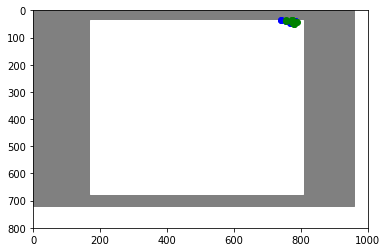

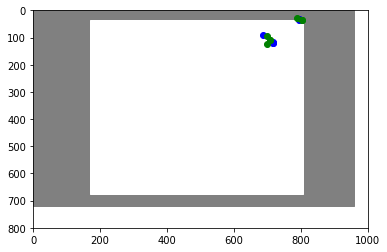

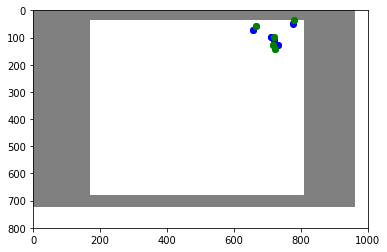

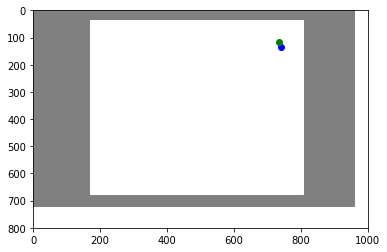

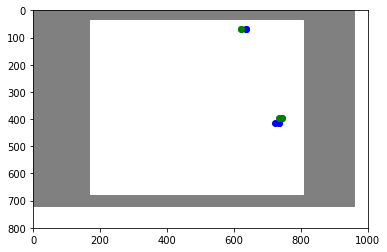

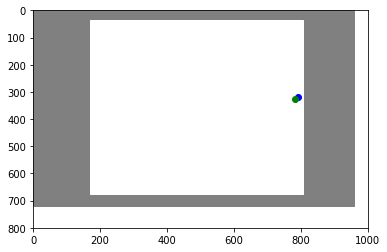

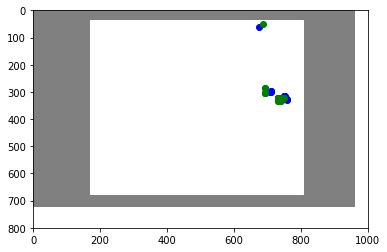

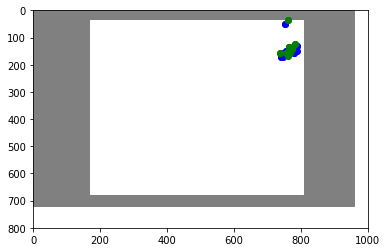

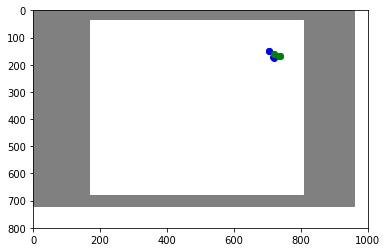

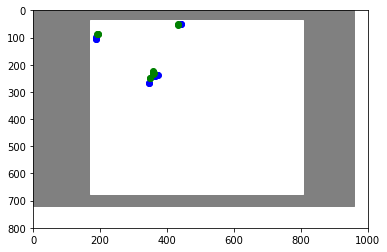

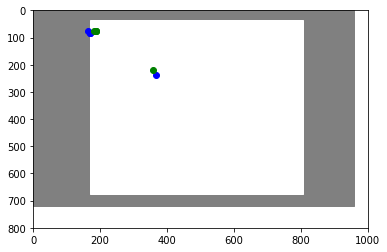

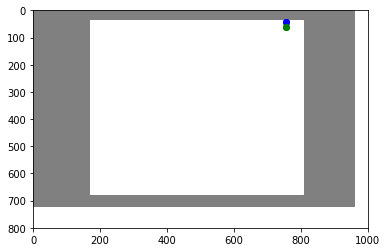

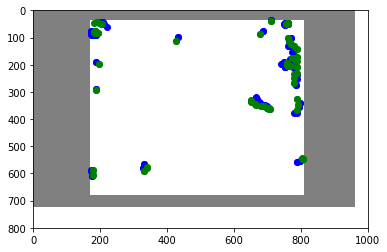

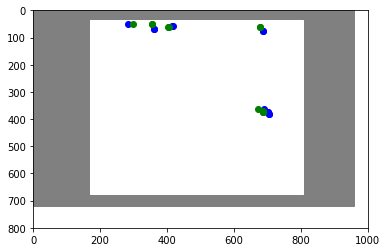

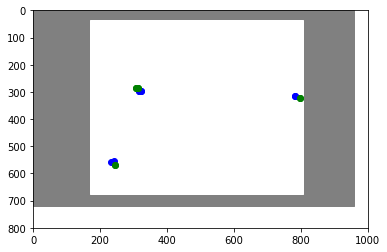

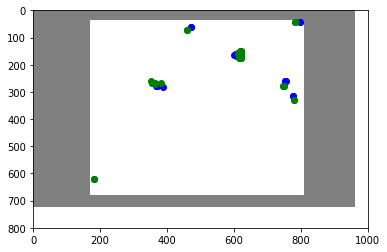

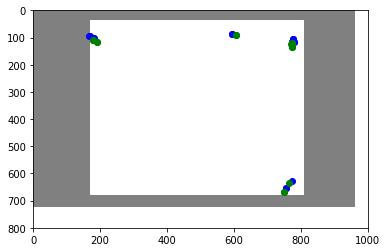

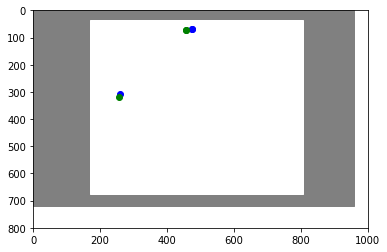

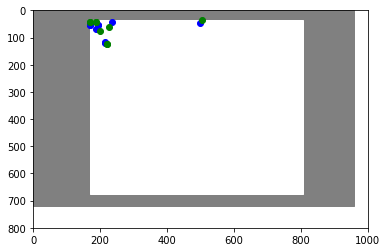

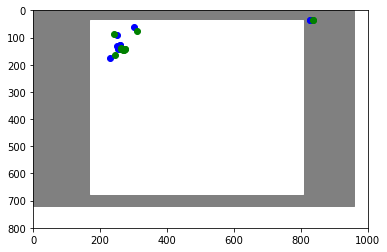

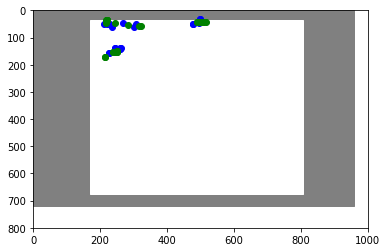

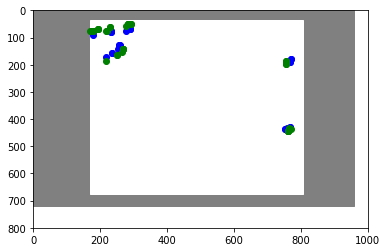

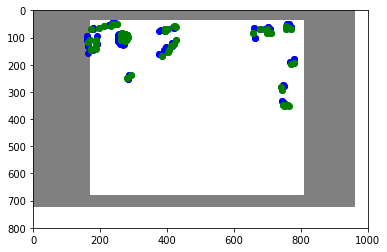

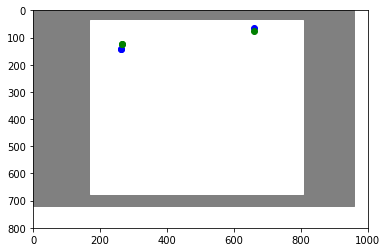

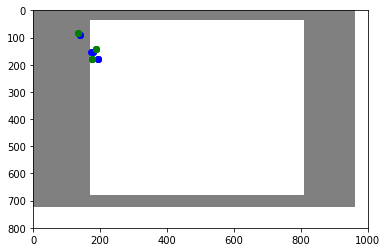

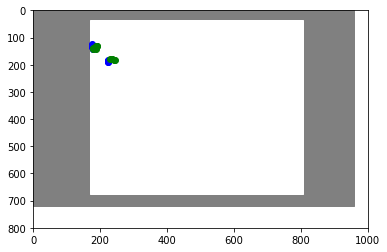

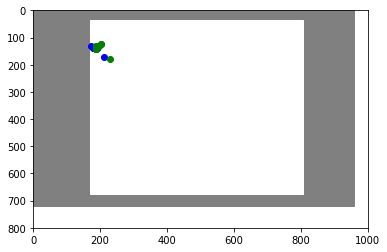

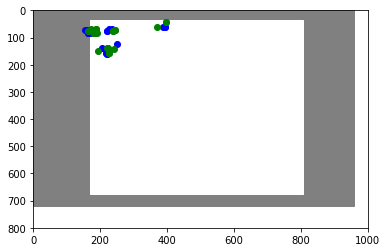

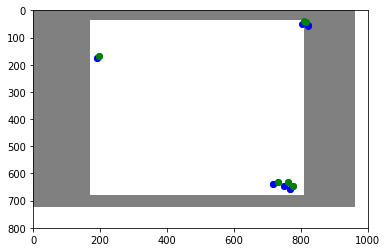

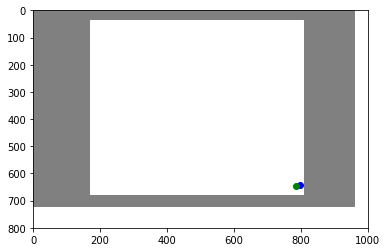

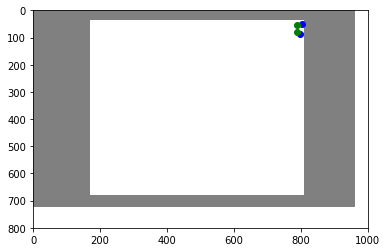

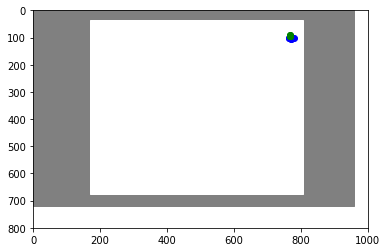

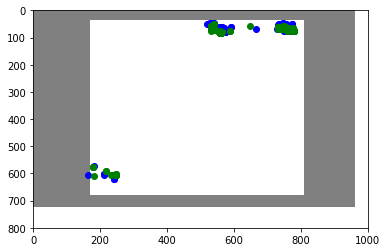

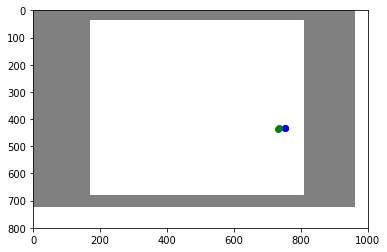

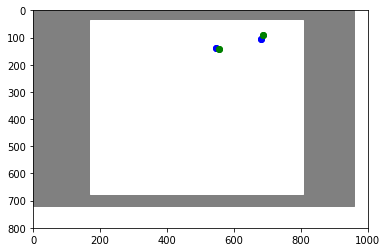

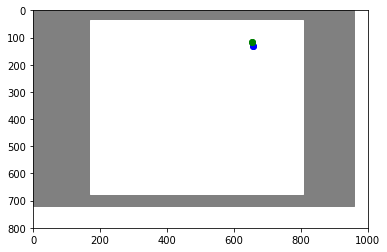

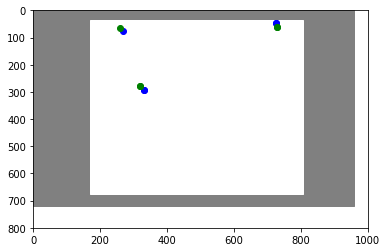

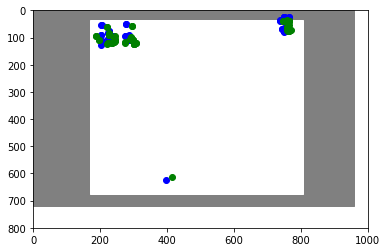

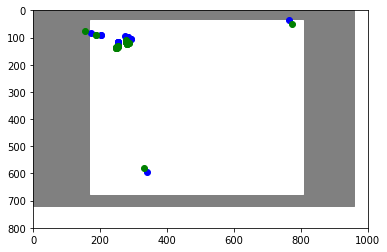

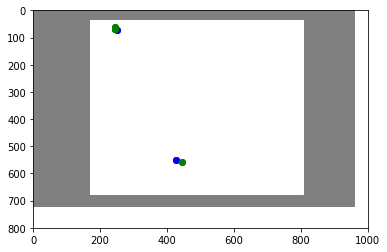

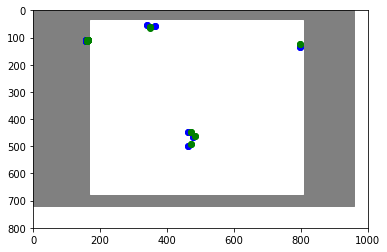

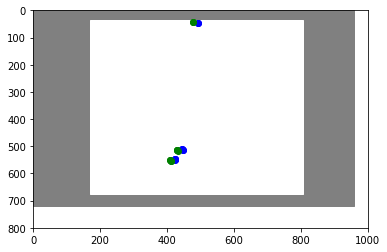

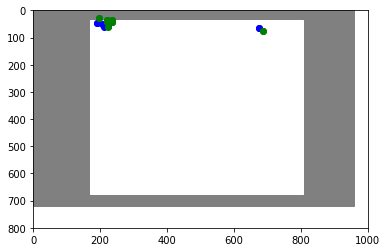

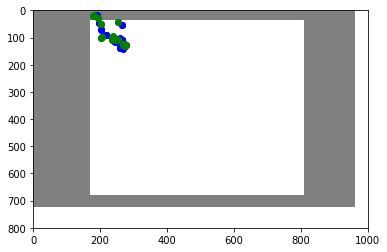

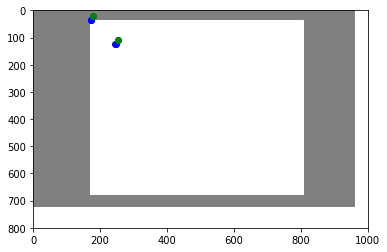

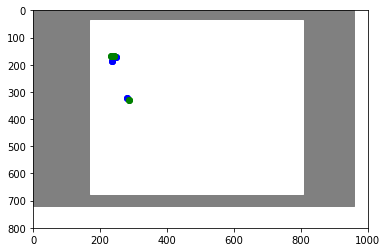

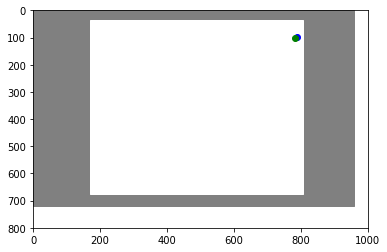

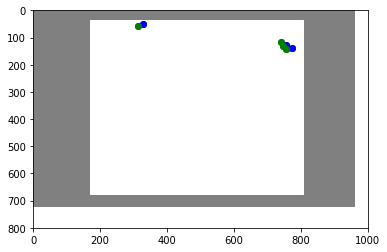

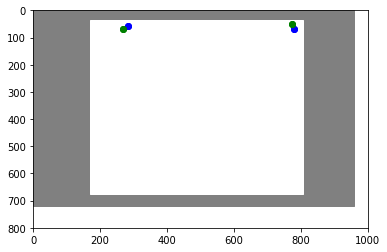

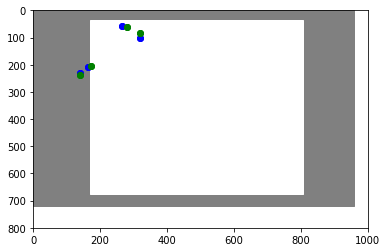

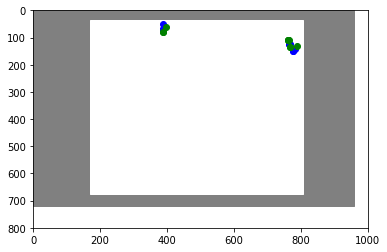

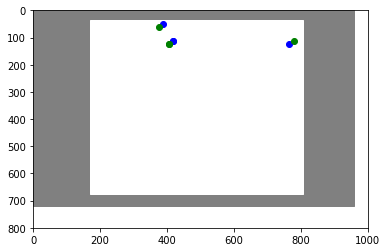

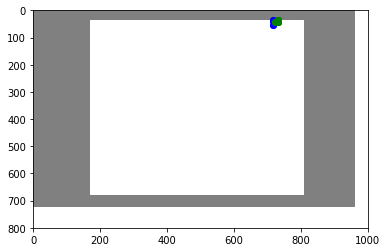

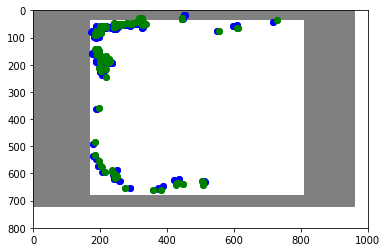

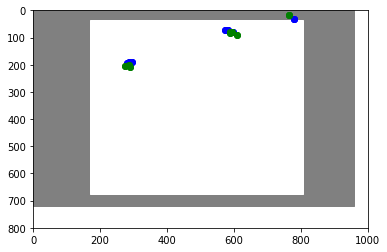

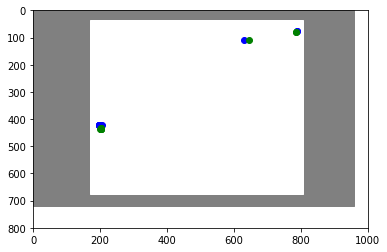

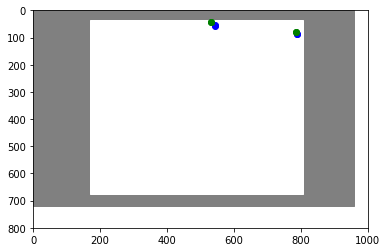

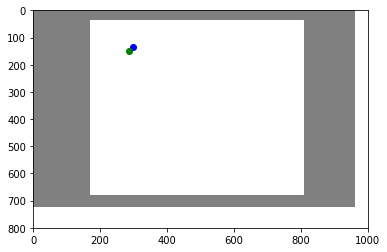

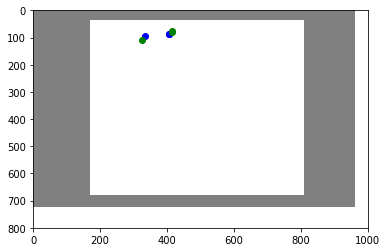

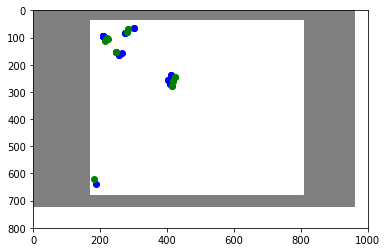

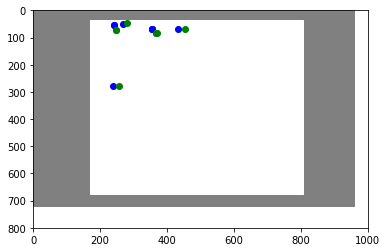

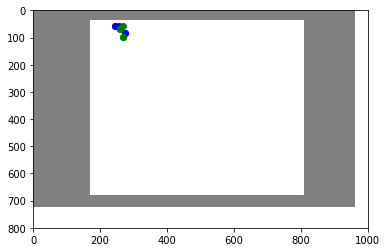

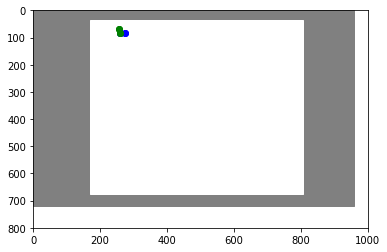

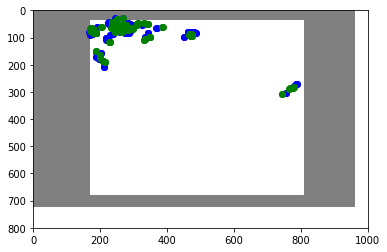

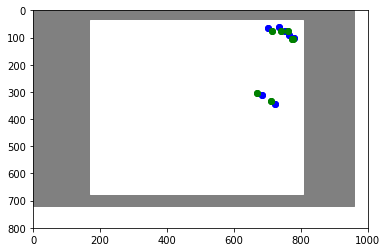

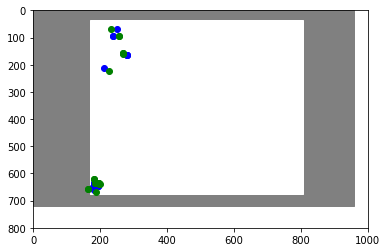

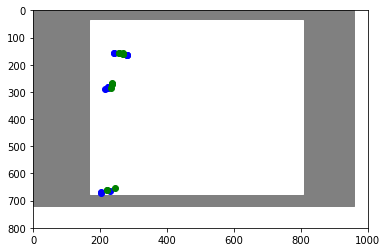

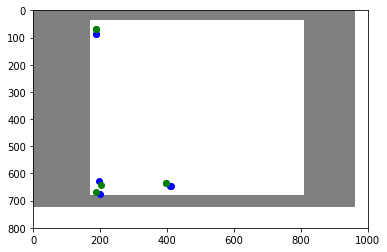

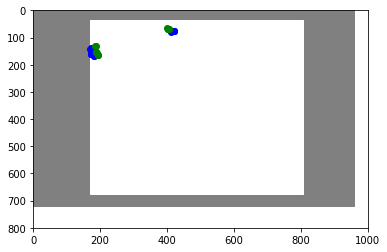

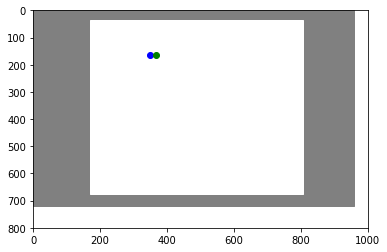

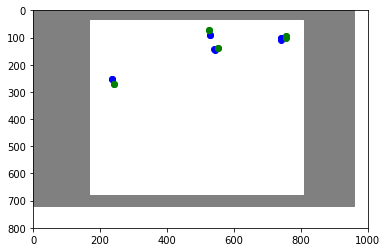

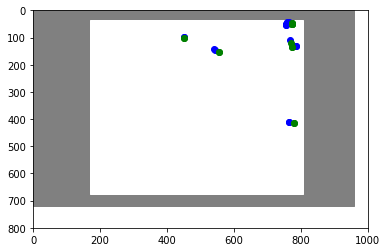

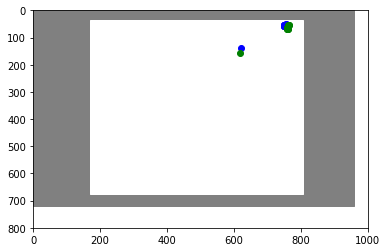

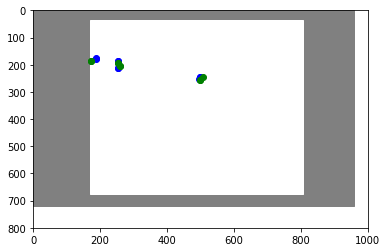

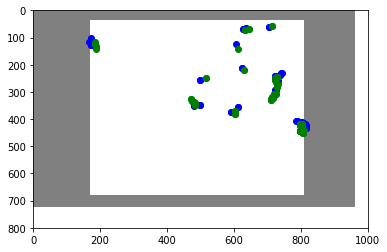

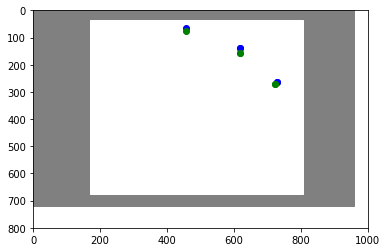

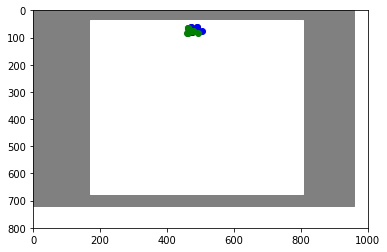

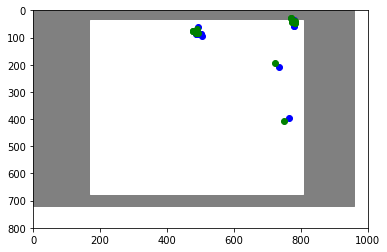

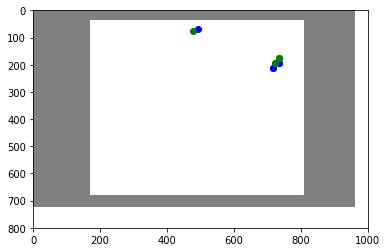

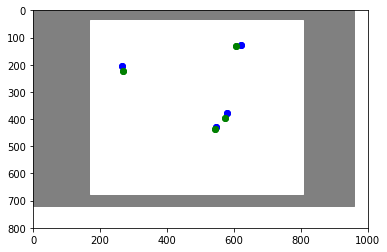

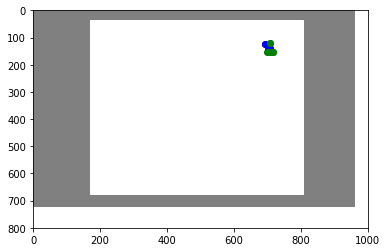

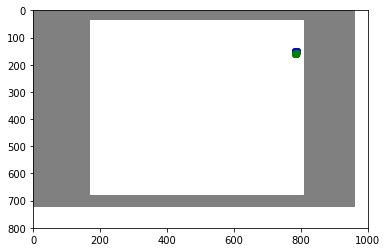

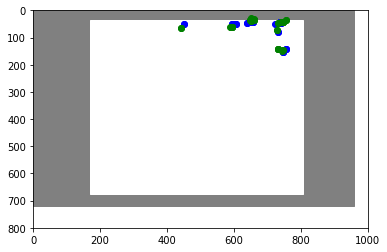

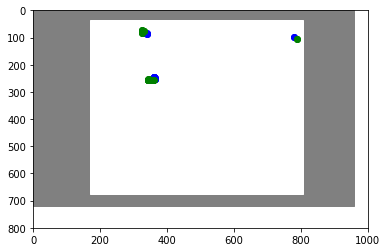

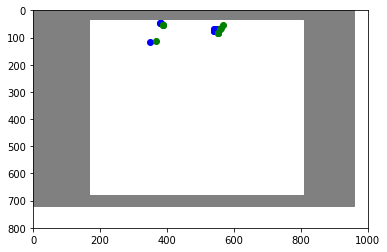

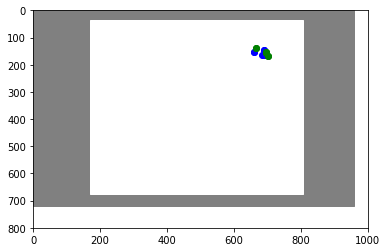

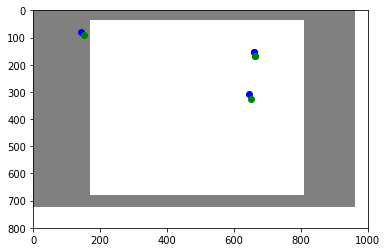

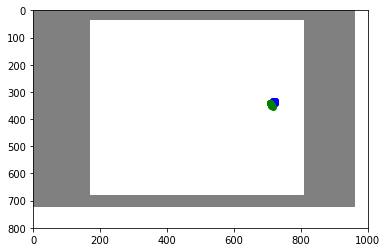

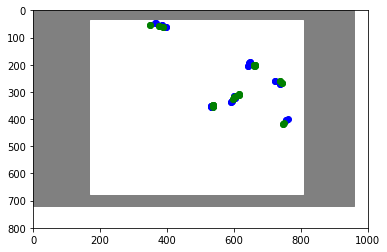

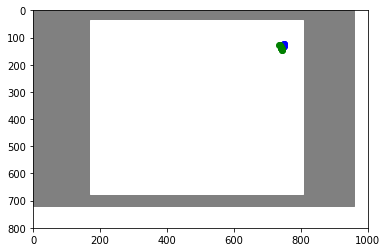

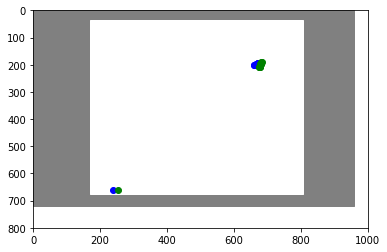

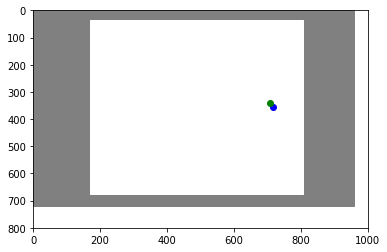

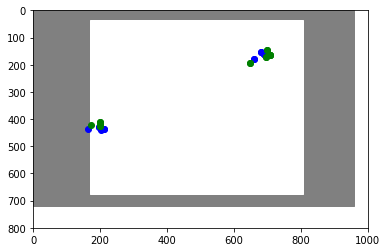

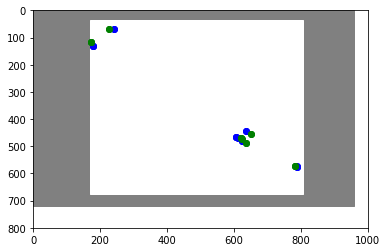

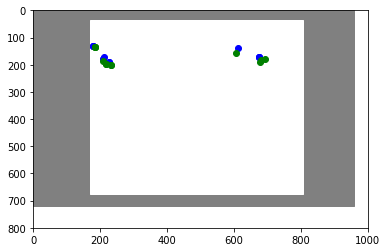

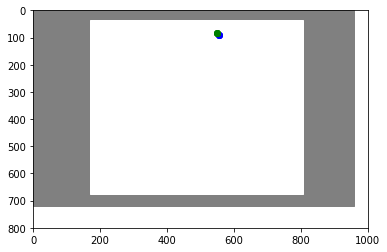

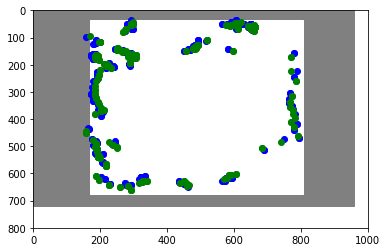

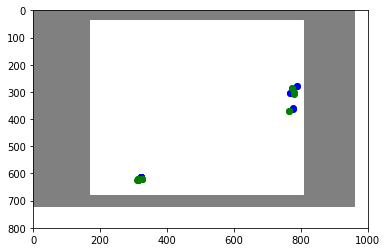

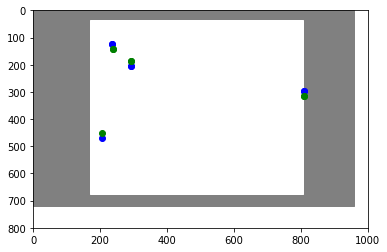

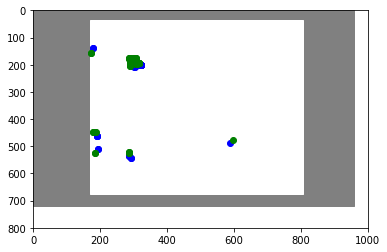

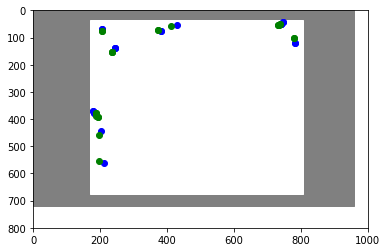

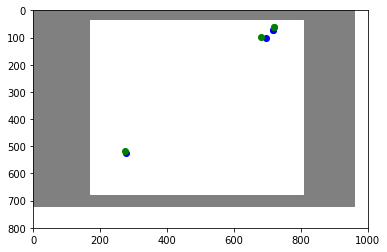

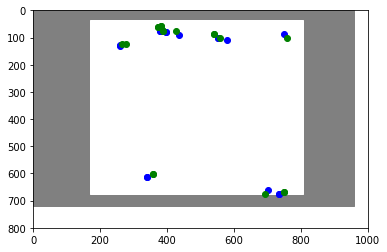

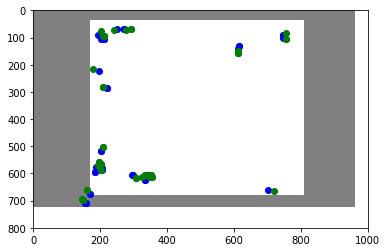

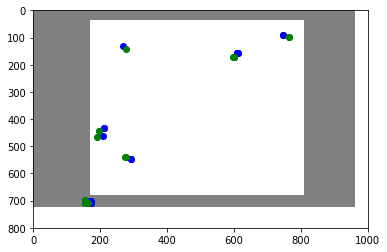

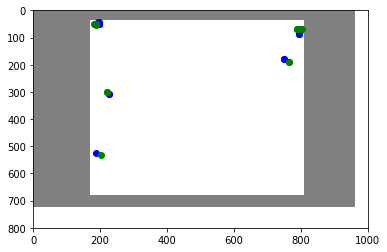

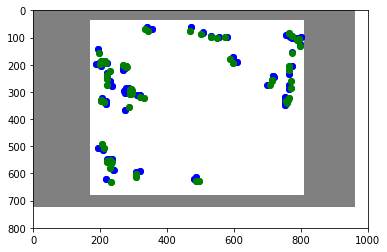

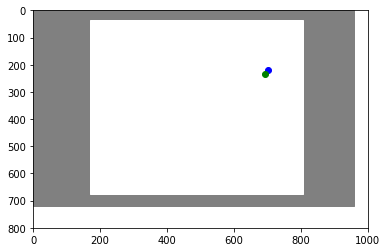

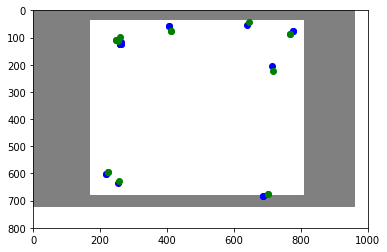

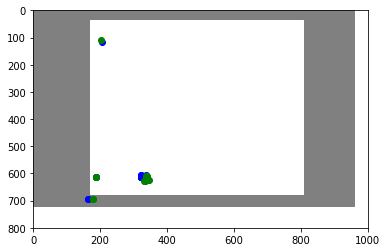

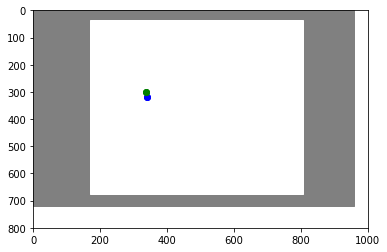

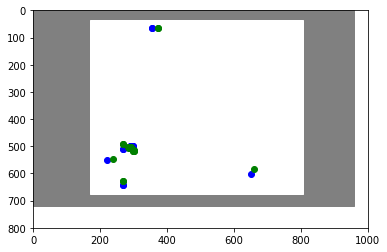

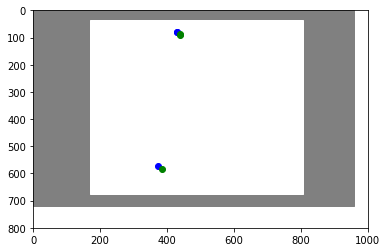

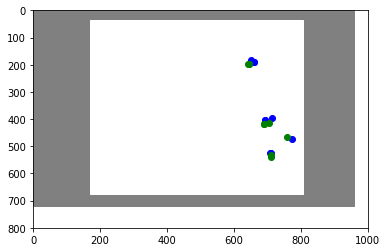

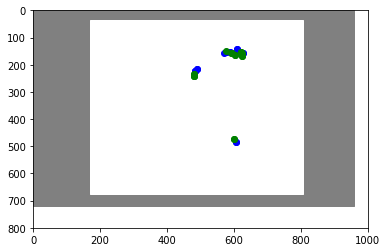

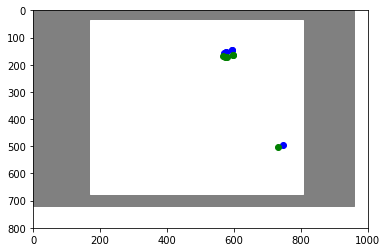

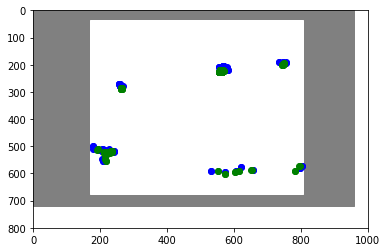

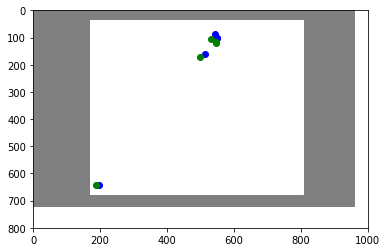

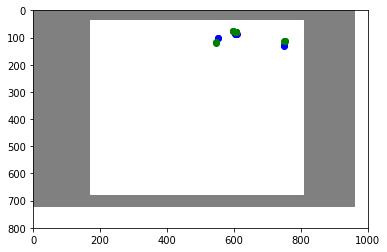

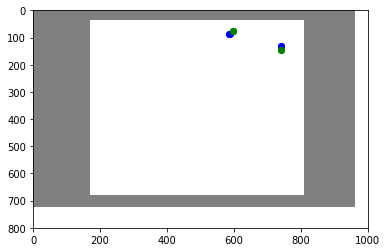

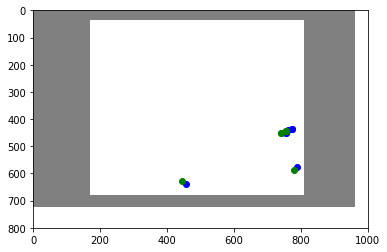

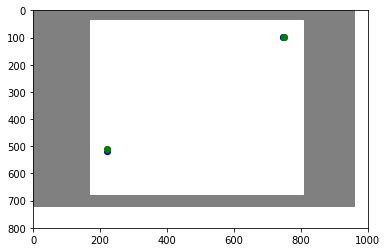

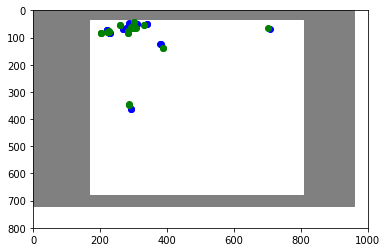

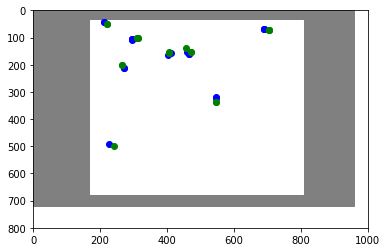

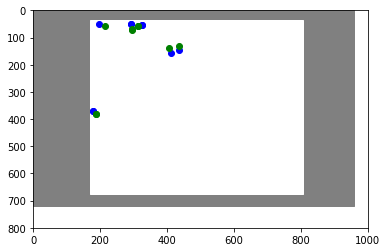

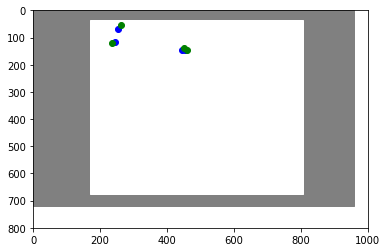

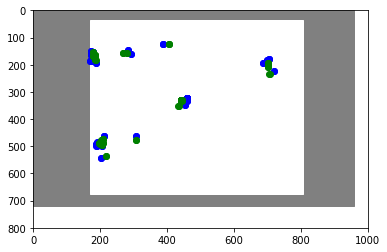

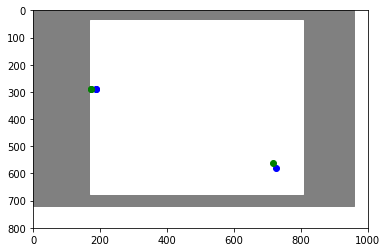

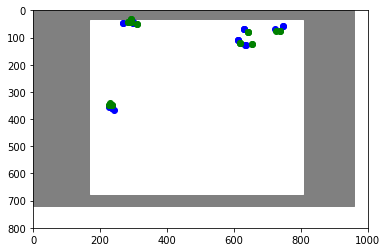

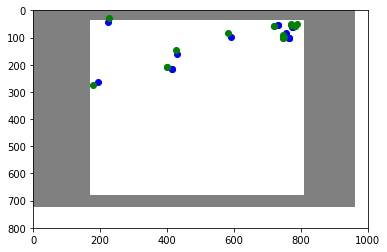

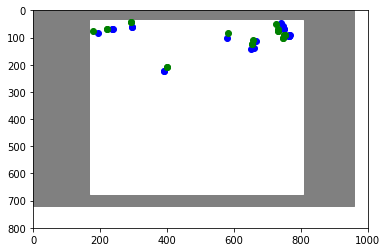

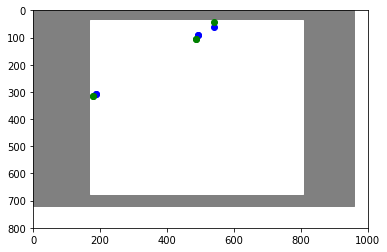

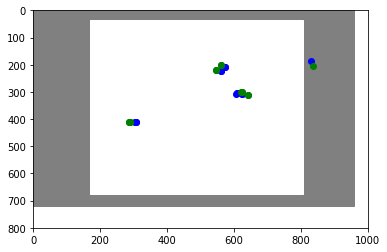

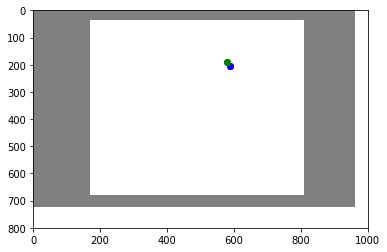

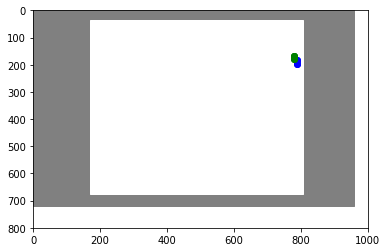

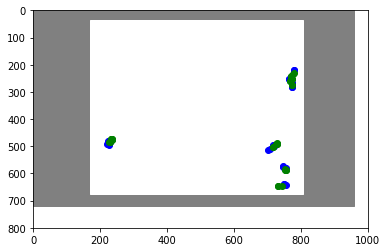

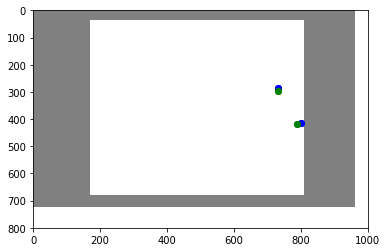

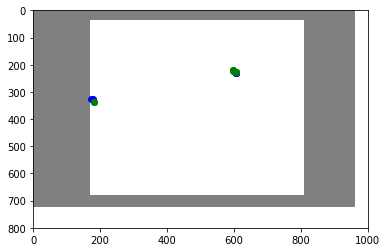

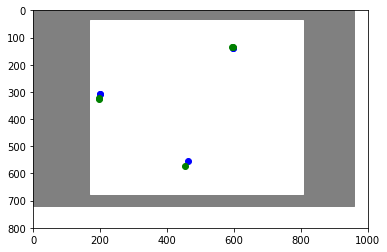

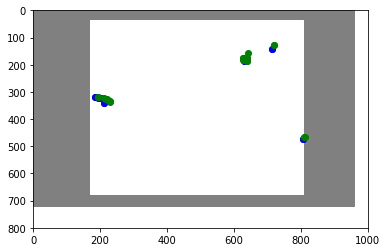

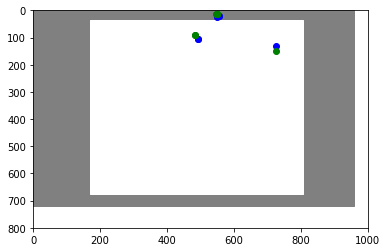

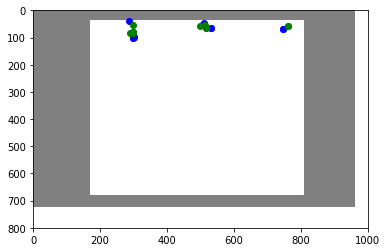

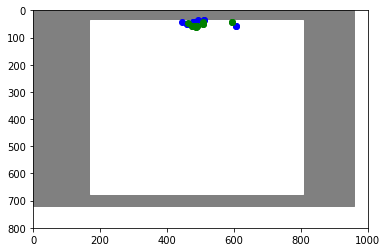

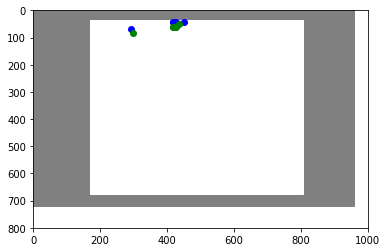

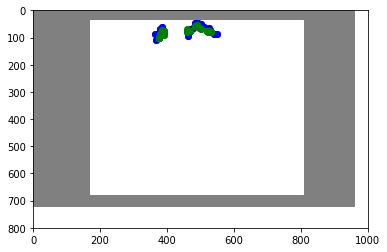

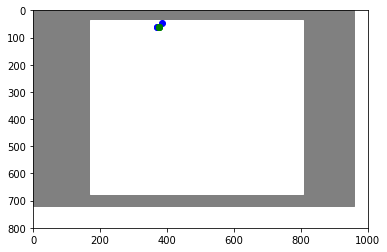

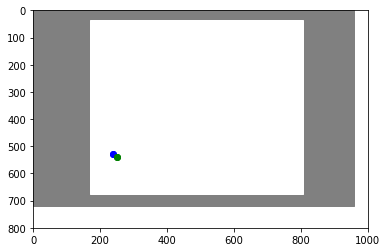

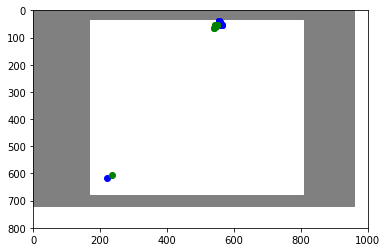

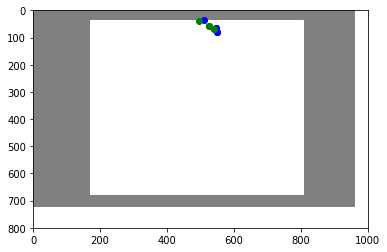

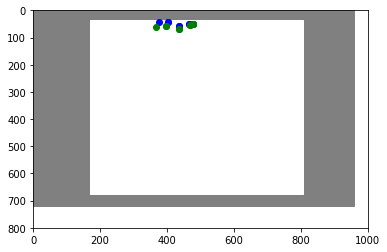

In [91]:
for i, csv_file_results in enumerate(all_files_results):
    for combination_result in csv_file_results:
        if not combination_result.empty:
            
            fig = plt.figure()
            ax = fig.add_subplot(111)
            rect1 = matplotlib.patches.Rectangle((0, 0),
                                                 960, 720,
                                                 color ='grey') #total video area 960x720 pixels
            rect2 = matplotlib.patches.Rectangle((170, 37),
                                                 637, 637,
                                                 color ='white') #total cage area 65x65cm
            ax.add_patch(rect1)
            ax.add_patch(rect2)
            plt.xlim([0,1000])
            plt.ylim([800, 0])

            #define coordinates for each combination
            r1_x = np.array(combination_result.iloc[:,0]).astype('float')
            r1_y = np.array(combination_result.iloc[:,1]).astype('float')

            r2_x = np.array(combination_result.iloc[:,2]).astype('float')
            r2_y = np.array(combination_result.iloc[:,3]).astype('float')

            plt.scatter(r1_x, r1_y, color='blue')
            plt.scatter(r2_x, r2_y, color='green')